In [ ]:

# Data Loading & Exploration

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("covid_19_clean_complete.csv")

# Check dataset structure
print("Columns in dataset:", df.columns)

# Preview first few rows
print(df.head())

# Identify missing values
print("Missing values per column:\n", df.isnull().sum())

# Get dataset summary
print(df.info())  # Provides data types and non-null counts


Columns in dataset: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
Missing values per column

In [ ]:
# Data Cleaning

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("covid_19_clean_complete.csv")

# Filter countries of interest
selected_countries = ["Kenya", "US", "India", "Brazil"]
df = df[df["Country/Region"].isin(selected_countries)]

# Drop rows with missing critical values (e.g., total_cases & total_deaths)
df = df.dropna(subset=["Confirmed", "Deaths"])

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Handle missing numeric values (Fill with previous values or interpolate)
df.fillna(method="ffill", inplace=True)  # Forward fill method
# Alternative: df.interpolate(method="linear", inplace=True)  # Linear interpolation

# Display cleaned dataset preview
print(df.head())


     Province/State Country/Region        Lat       Long       Date  \
28              NaN         Brazil -14.235000  -51.92530 2020-01-22   
129             NaN          India  20.593684   78.96288 2020-01-22   
140             NaN          Kenya  -0.023600   37.90620 2020-01-22   
223             NaN             US  40.000000 -100.00000 2020-01-22   
289             NaN         Brazil -14.235000  -51.92530 2020-01-23   

     Confirmed  Deaths  Recovered  Active       WHO Region  
28           0       0          0       0         Americas  
129          0       0          0       0  South-East Asia  
140          0       0          0       0           Africa  
223          1       0          0       1         Americas  
289          0       0          0       0         Americas  


/tmp/ipykernel_255/2021924763.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill method


In [ ]:
#Exploratory Data Analysis (EDA)

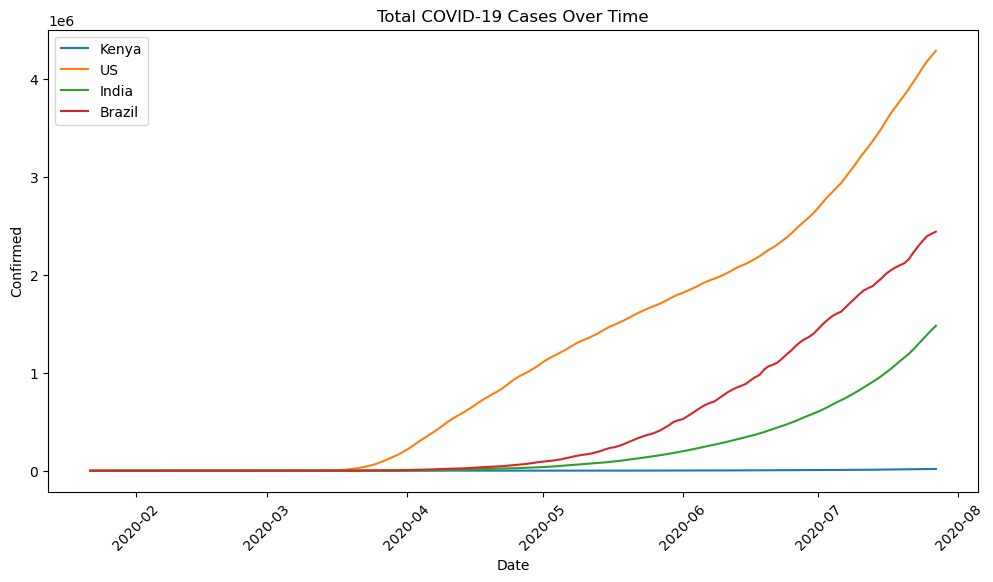

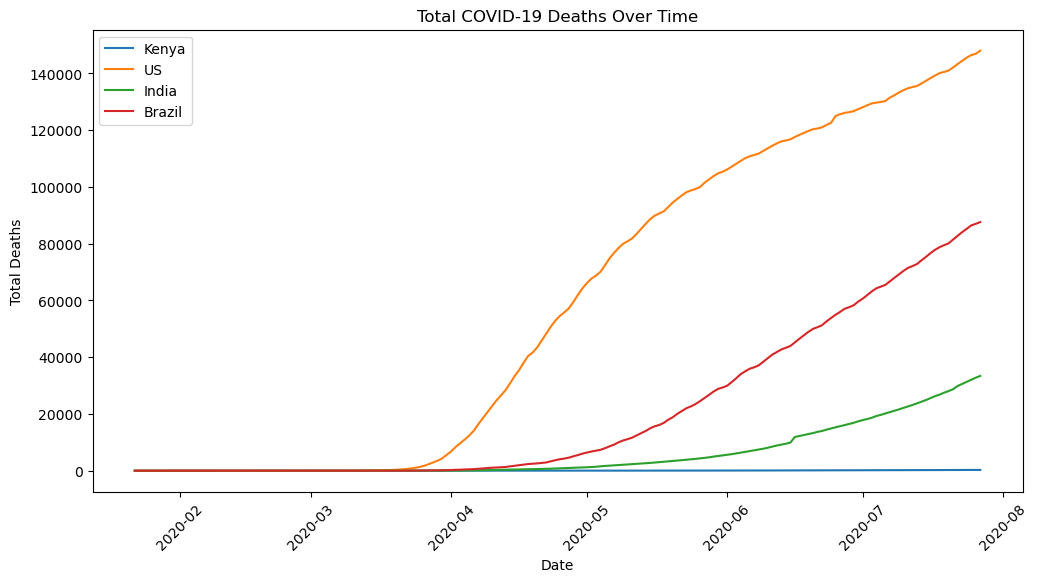

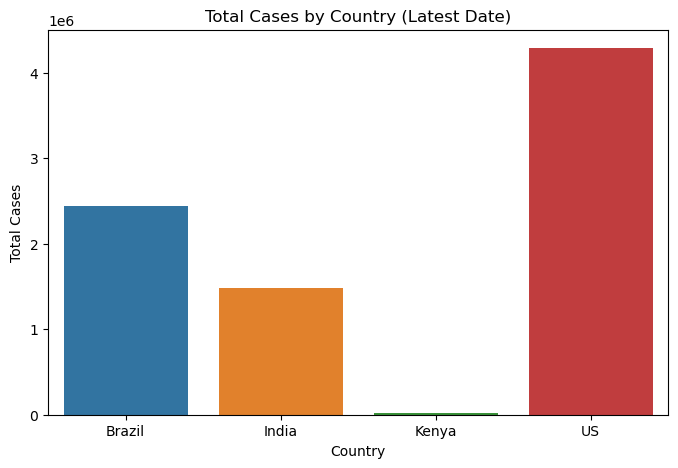

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("covid_19_clean_complete.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Filter selected countries
selected_countries = ["Kenya", "US", "India", "Brazil"]
df = df[df["Country/Region"].isin(selected_countries)]

# Calculate death rate
df["death_rate"] = df["Deaths"] / df["Confirmed"]

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df[df["Country/Region"] == country]
    plt.plot(subset["Date"], subset["Confirmed"], label=country)

plt.xlabel("Date")
plt.ylabel("Confirmed")
plt.title("Total COVID-19 Cases Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = df[df["Country/Region"] == country]
    plt.plot(subset["Date"], subset["Deaths"], label=country)

plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total COVID-19 Deaths Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Bar chart: Total cases by country (latest date)
latest_data = df[df["Date"] == df["Date"].max()]
plt.figure(figsize=(8, 5))
sns.barplot(x="Country/Region", y="Confirmed", data=latest_data)
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.title("Total Cases by Country (Latest Date)")
plt.show()
